In [25]:
import numpy as np
from matplotlib import pyplot as plt
from v2_dataset_tools.experiments import get_results_from_db_path
import os
import sys

## Export 1D trace to text file

In [111]:
path = 'SagRes0122_DEV5/6'
dv = get_results_from_db_path(path)

In [112]:
dv

results #77@./experiments.db
----------------------------
yoko_voltage - numeric
current - numeric
raw_voltage_dc - numeric
conductance - numeric
L1X - numeric
L1Y - numeric
V_ref - numeric

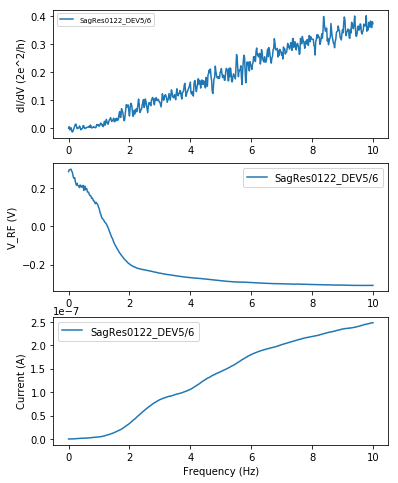

In [113]:
#frequency = np.array(dv.get_values('RF_frequency'))[:,0]
yoko_voltage = np.array(dv.get_values('yoko_voltage'))[:,0]
dc_current = np.array(dv.get_values('current'))[:,0]
didv = np.array(dv.get_values('conductance'))[:,0]
#L1X = np.array(dv.get_values('L1X'))[:,0]
#L1Y = np.array(dv.get_values('L1Y'))[:,0]
V_ref = np.array(dv.get_values('V_ref'))[:,0]

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(6, 8))

ax1.plot(yoko_voltage, didv, label=path)
ax2.plot(yoko_voltage, V_ref, label=path)
ax3.plot(yoko_voltage, dc_current, label=path)
ax1.legend(loc='upper left', fontsize='x-small')
ax1.set_ylabel('dI/dV (2e^2/h)')
ax3.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('V_RF (V)')
ax2.legend()
ax3.set_ylabel('Current (A)')
ax3.legend()

In [114]:
#File info
DIR = r"D:\Data\Exports\John"
fname = 'SagRes0122_DEV5_6.txt'
fullpath = os.path.join(DIR, fname)
file = open(fullpath,'w')

parameters = dv.get_parameters()
columns = []
for i in range(len(parameters)):
    temp = str(parameters[i]).rsplit(' ', 1)[0]
    file.write(temp + str('\t'))
    columns.append(temp)
file.write('\n')


for j in range(len(np.array(dv.get_values(columns[0]))[:,0])):
    for i in range(len(parameters)):
        data = np.array(dv.get_values(columns[i]))[j,0]
        file.write(str(data) + '\t')
    file.write('\n')

file.close()

## Export 2D sweep to text file
Saves a single parameter to a file with a header containing info on the axes ranges.  You will have to run this section multiple times to save data recorded from multiple instruments

In [115]:
path = 'SagRes0122_DEV5/12'
dv = get_results_from_db_path(path)

In [116]:
dv

results #83@./experiments.db
----------------------------
yoko_voltage - numeric
sr1_sine_outdc - numeric
current - numeric
raw_voltage_dc - numeric
conductance - numeric
L1X - numeric
L1Y - numeric
V_ref - numeric

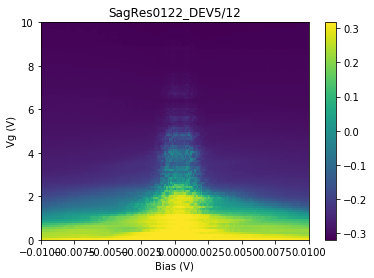

In [119]:
X_all = np.array(dv.get_values('sr1_sine_outdc'))[:,0]
Y_all = np.array(dv.get_values('yoko_voltage'))[:,0]
Z_all = np.array(dv.get_values('V_ref'))[:,0]

X_single = np.unique(X_all)
Y_single = np.unique(Y_all)
Z2D = np.empty([len(Y_single), len(X_single)])
for i in range(len(Y_single)):
    for j in range(len(X_single)):
        Z2D[i,j] = Z_all[i*len(X_single) + j]
        
%matplotlib inline
#plt.figure(3)
plt.pcolormesh(X_single, Y_single, Z2D)#, vmin=0, vmax=0.5)
plt.colorbar()
plt.xlabel('Bias (V)')
plt.ylabel('Vg (V)')
plt.title(path)
plt.show()

In [120]:
#File info
DIR = r"D:\Data\Exports\John"
fname = 'SagRes0122_DEV5_12_RF.txt'
fullpath = os.path.join(DIR, fname)
file = open(fullpath,'w')

X_parameter = 'sr1_sine_outdc'
Y_parameter = 'yoko_voltage'



file.write('X label: ' + X_parameter + '\n')
file.write('X min: ' + str(min(X_single)) + '\n')
file.write('X max: ' + str(max(X_single)) + '\n')
file.write('N_x: ' + str(len(X_single)) + '\n')
file.write('Y label: ' + Y_parameter + '\n')
file.write('Y min: ' + str(min(Y_single)) + '\n')
file.write('Y max: ' + str(max(Y_single)) + '\n')
file.write('N_y: ' + str(len(Y_single)) + '\n')

for i in range(len(Y_single)):
    for j in range(len(X_single)):
        file.write(str(Z2D[i,j]) + '\t')
    file.write('\n')

file.close()